# Минипроект №4.
На этот раз данные имеют следующую структуру:

- записываются для каждого пользователя, совершившего покупки, каждый день
- для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
- внутри каждой папки есть файл data.csv, где и хранятся данные

Например, 30 декабря три покупателя сделали покупки, 31 – два 
(папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

### Задачи:
- Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)
- Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
- Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?
- Визуализируйте продажи по дням.
- Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 
      



In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

### Задача №1.
Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (**product_id**, **quantity**), имя пользователя (**name**), и дату этих покупок (**date**, соответствует названию папки, где лежит папка с пользователем).

**В качестве ответа** укажите сумму по колонке ***quantity***.

In [2]:
path = 'C:/Users/79196/Projects/data/data_user_id' 

In [3]:
df = pd.DataFrame()
for current_path, dirs, files in os.walk(path):
    for file in files:
        data_path = f'{current_path}/{file}'
        
        temp_df = pd.read_csv(data_path)
        
        path_parts = current_path.split('\\')
        date = path_parts[-2]
        name = path_parts[-1]
        
        temp_df['name'] = name
        temp_df['date'] = date
                            
        df = pd.concat((df, temp_df))
df.head()

,Unnamed: 0,product_id,quantity,name,date
0,0,47,1,Alexey_Smirnov,2020-12-03
1,1,57,1,Alexey_Smirnov,2020-12-03
2,2,14,2,Alexey_Smirnov,2020-12-03
3,3,52,1,Alexey_Smirnov,2020-12-03
4,4,1,4,Alexey_Smirnov,2020-12-03


In [4]:
s = df.drop(columns='Unnamed: 0').reset_index(drop=True)
s.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


In [5]:
f"Ответ: {df['quantity'].sum()}"

'Ответ: 480'

### Задача №2.

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. 

In [6]:
top_users = s.groupby('name', as_index=False) \
             .agg({'quantity':'sum'}) \
             .sort_values('quantity', ascending=False)
top_users.head()

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28


**Ответ:** Alexey_Smirnov, Petr_Smirnov

### Задача №3.
Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот, где:

- по оси x – идентификаторы товаров (product_id) 
- по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)

В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

In [7]:
p = s.groupby('product_id', as_index=False) \
     .agg({'quantity':'sum'}) \
     .sort_values('quantity', ascending=False) \
     .head(10)
p

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


<Axes: xlabel='product_id', ylabel='quantity'>

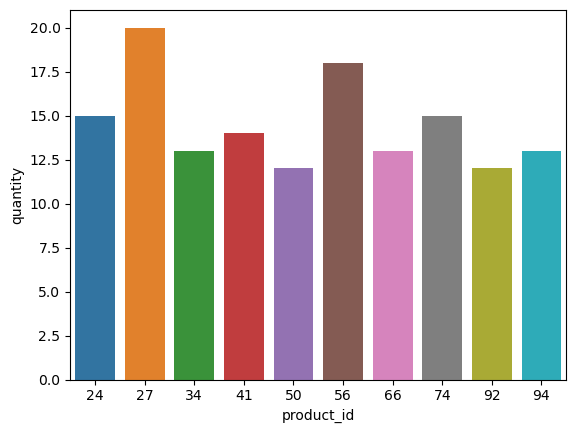

In [8]:
sns.barplot(data=p, x='product_id', y='quantity')

**Ответ:** 18

### Задача №4.
Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (**date**). Далее выберите верные утверждения:

- Меньше всего продуктов было приобретено 4 декабря
- Меньше всего товаров было приобретено 6 декабря
- Максимальное число товаров было продано 4 декабря
- 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
- 7 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
- 5 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
- 8 и 9 декабря было продано примерно одинаковое число товаров
- 5 декабря было куплено почти в три раза меньше товаров, чем в предыдущий день

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2020-12-03'),
  Text(1, 0, '2020-12-04'),
  Text(2, 0, '2020-12-05'),
  Text(3, 0, '2020-12-06'),
  Text(4, 0, '2020-12-07'),
  Text(5, 0, '2020-12-08'),
  Text(6, 0, '2020-12-09')])

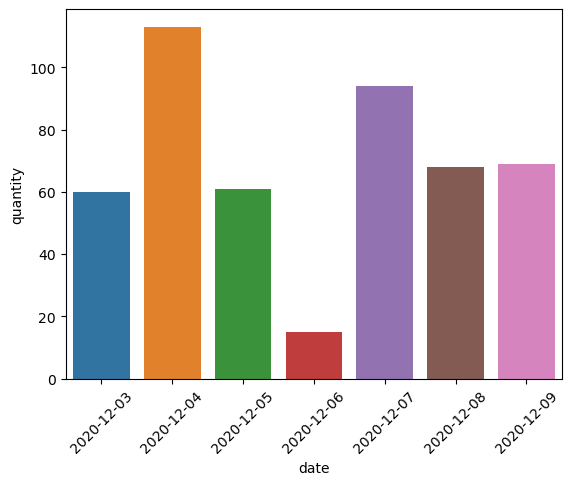

In [9]:
quantity_by_days = s.groupby('date', as_index=False) \
                    .agg({'quantity':'sum'})
sns.barplot(data=quantity_by_days, x='date', y='quantity')
plt.xticks(rotation=45)

**Ответ:** 
- Меньше всего товаров было приобретено 6 декабря
- Максимальное число товаров было продано 4 декабря
- 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день

### Задача №5.
Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым **product_id**, совершенную в разные дни. 

In [10]:
pls = s.drop_duplicates(['date', 'name', 'product_id']) \
       .groupby(['name', 'product_id'], as_index=False) \
       .agg({'date':'count'}) \
       .query('date > 1') 
pls

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


**Ответ:** 2 пользователя: Anton_Ivanov, Petr_Fedorov